In [44]:
import json
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from elementembeddings.composition import CompositionalEmbedding

# Set print options for better readability of output
np.set_printoptions(suppress=True)

# Load your descriptors JSON file (assuming it has formulas as keys and energy of formation as values)
with open('descriptor.json', 'r') as f:
    descriptors = json.load(f)

# Initialize lists to store features and targets
features = []
targets = []

# Iterate over each formula in the descriptors
for formula, energy in descriptors.items():
    # Generate embeddings for each formula using different methods
    try:
        print(formula)
        # Using mat2vec embedding for demonstration
        mat2vec = CompositionalEmbedding(formula=formula, embedding="mat2vec").embedding

        # Convert mat2vec embedding to a flattened list of values to use as features
        combined_embedding = np.array(list(mat2vec.embeddings.values())).flatten()

        # Append the flattened embedding to features
        features.append(combined_embedding)
        
        # Convert energy to float and append to targets
        if isinstance(energy, (float, int)):
            targets.append(float(energy))
        elif isinstance(energy, list) or isinstance(energy, tuple):
            # Use the first element if energy is a list or tuple, adjust as needed
            targets.append(float(energy[1]))
        else:
            print(f"Invalid target type for formula {formula}: {energy}")
            continue

    except Exception as e:
        print(f"Error processing formula {formula}: {e}")
        continue

# Convert features and targets to numpy arrays for training
X = np.array(features)
y = np.array(targets)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

# Calculate R^2 scores
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(f"R^2 on training set: {r2_train}")
print(f"R^2 on test set: {r2_test}")


Ir2Na2
Pt2As
Ni4Ta6
MoSm
GeP3
Mn4Sb2
BaBr2
Ca4P6
Ba4Pd2
CaMo3
Sr6Br4
Fe16Na4
Pb2Sb2
In5Sn
Sn17P12
Nb4Pb4
InSn5
Ba2Bi3
Ga2Sr
Pd2Ta2
CuNb
Ba2Pd
Ge4P12
Mo3W3
Mn8Sb
Cu3Ga
Pb2Sb6
MnRh
Ca3Mo
Fe4Na
Sn6W10
FeGa2
Mo2W4
In2Br4
V4Br2
BaPd5
FeAs3
In2Sn2
BiGe
Ca4In
BiP
Nb2Pb4
FeIn
Cu2Ga2
Fe4Na8
PtSm
Ac4I6
Fe6Sb18
In2Sn4
In4Sn2
RhGe3
Ir4Sn16
FeNa3
SnP
BiI
SnP3
Fe2Ga2
Ni4U6
Ga5Br
Ca3Pb
Mo2W2
Ga2Br2
VBr3
Ba2Ir
Ca2In2
Pt2As2
BaPd
Cr5P24
Fe2Ga4
PbSb
Ce4Sb8
Nb4Pb2
GaRb
IrNa3
K5P3
Sn4P
V2Br2
CrP7
Fe3Na
BaBr3
FeNa
FeW2
Fe2Pb2
Cr4P
Ag4Al4
Cr5Nb
K2As2
CuNi
Pd16Ta14
MoPb5
As4Br2
AsBr
Ba5Pd
Mo3W
PAs5
P12As17
K3Sn
Ca6P2
CuBr3
Ag7Al3
Ag5Al3
Ba4Sb2
Ge8I32
Ag6Al2
AsBr8
MnSb8
Pd2Sb4
CrNb
KGe3
PtV2
NbPb3
Ba3Br
K5Ge
Ba2Cu2
Fe3Pb
Al12Sn4
K3P
CsBr
V4W4
Ba2Cu4
V2W
Mo4Nb4
BaCu3
Al3Sn
GeP5
Ba16Ir4
Cu5Pt7
Pb16V8
Pd3Sb
K2Ge4
CuPb
CrNb3
Nb2Pb
Ce20Ir16
In2Ge2
Ag4Al
K2Ge6
Ce4Ge4
Pt10Sn6
PdW2
PAs3
K4Ni2
Cu6Pt4
W16Sb4
PdTa4
BaCu5
Ca3P5
Ca12Mo4
Ga14Pt6
Fe2Pb
Mo4Pb2
As2Br6
P5As
Fe24Pb5
W24P5
Cu6Pt6
MoPb3
RhU
As16Br4
Ag8Ta4
RbBi
PA

In [43]:
X[0].shape

(23600,)

R^2 on training set: -2.1085473680404476e-06
R^2 on test set: -0.0015423222726214103


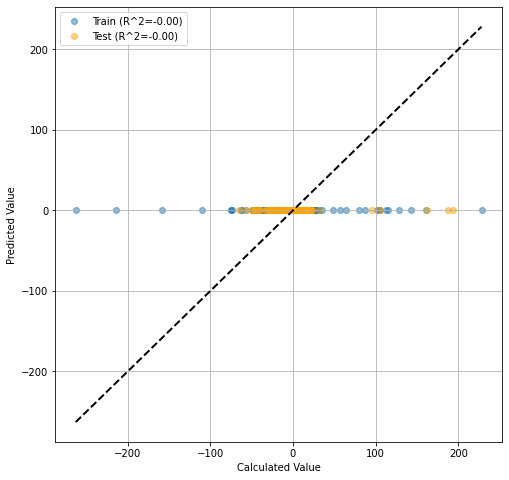

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R^2 scores
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

# Print R^2 scores
print(f"R^2 on training set: {r2_train}")
print(f"R^2 on test set: {r2_test}")

# Make predictions for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot parity plot
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, label=f'Train (R^2={r2_train:.2f})', alpha=0.5)
plt.scatter(y_test, y_test_pred, label=f'Test (R^2={r2_test:.2f})', alpha=0.5, color='orange')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2)  # Diagonal line for perfect prediction
plt.xlabel('Calculated Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()
